In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

sns.set_style("darkgrid")

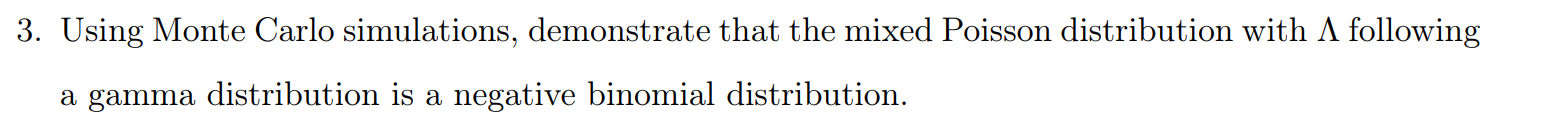

## Mixed Poisson Distribution

A **Mixed Poisson Distribution** extends the standard Poisson distribution by allowing its rate parameter $\lambda$ to be random instead of fixed. This makes it more flexible in modeling count data with extra variability.

### Definition
If $\Lambda$ is a random variable with distribution $G(\lambda)$, and $X$ follows a Poisson distribution with rate $\lambda$ conditional on $\Lambda = \lambda$, then $X$ follows a mixed Poisson distribution. Formally:

$$
    X \mid \Lambda = \lambda \sim \text{Poisson}(\lambda)
$$

The overall probability mass function (PMF) of $X$ is:

$$
    P(X = x) = \int_0^\infty \frac{\lambda^x e^{-\lambda}}{x!} \, dG(\lambda)
$$

where $x = 0, 1, 2, \dots$, and $G(\lambda)$ is the cumulative distribution function (CDF) of $\Lambda$.

### Key Idea
Unlike the standard Poisson distribution, where $\lambda$ is fixed, here $\lambda$ changes according to a distribution. This allows the model to handle overdispersion (variance larger than the mean), which the standard Poisson distribution cannot.

### Examples of Mixing Distributions
1. **Gamma Distribution**: If $\Lambda \sim \text{Gamma}(\alpha, \beta)$, then $X$ follows a **Negative Binomial Distribution**.

2. **Discrete Distributions**: $\Lambda$ can also take discrete values with certain probabilities.

### Applications
Mixed Poisson distributions are useful in:
- **Insurance**: Modeling claim counts with varying claim rates.
- **Epidemiology**: Analyzing outbreaks with different infection rates across regions.
- **Econometrics**: Modeling purchase counts in customer behavior studies.

### Summary
The mixed Poisson distribution allows the rate parameter $\lambda$ to vary, offering a more flexible way to model count data with extra variability, such as overdispersion, that the standard Poisson model cannot handle.


In [ ]:
def poisson_culminative_gamma(n, alpha, beta):
    
    lambdas = ss.gamma.rvs(a=alpha, scale = 1/beta, size=n)
    mixed_poisson_rvs = ss.poisson.rvs(mu=lambdas)
    
    return mixed_poisson_rvs


def empirical_cdf(data):

    sorted_data = np.sort(data)
    n = len(sorted_data)
    
    y = np.arange(1, n + 1) / n
    
    return sorted_data, y


In [ ]:
mp_hist = []
nb_hist = []
mp_cdf = []
nb_cdf = []
nb_pmf = []

alpha_list = [2, 3, 5]
beta_list = [1/2, 1, 2]

for alpha in alpha_list:
    for beta in beta_list:
        
        r = alpha
        p = beta/(beta + 1)
        
        mp = poisson_culminative_gamma(100000, alpha, beta)
        mp_hist.append(mp)
        mp_cdf.append(empirical_cdf(mp))
        
        nb = ss.nbinom.rvs(n=r, p=p, size=100000)        
        nb_hist.append(nb)
        nb_cdf.append(empirical_cdf(nb))
        nb_pmf.append(ss.nbinom.pmf(k = np.arange(0, int(np.max(mp))), n=r, p=p))


For alpha = 2 and beta = 0.5 p value of KS test is 0.6613890078874529 and of Anderson-Darling test 0.25


C:\Users\Martyna\AppData\Local\Temp/ipykernel_4928/3544198594.py:4: UserWarning: p-value capped: true value larger than 0.25
  print(f'For alpha = {alpha_list[i//3]} and beta = {beta_list[i%3]} p value of KS test is {ss.kstest(mp_hist[i], nb_hist[i]).pvalue} and of Anderson-Darling test {ss.anderson_ksamp([mp_hist[i], nb_hist[i]]).significance_level}')


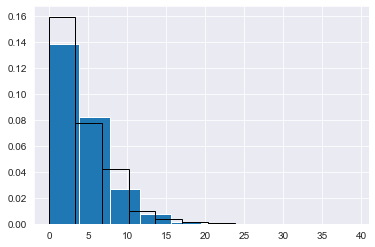

For alpha = 2 and beta = 1 p value of KS test is 0.18589067376056145 and of Anderson-Darling test 0.056581802400956345


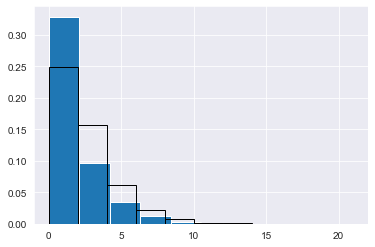

For alpha = 2 and beta = 2 p value of KS test is 0.813660635434612 and of Anderson-Darling test 0.09922016731329619


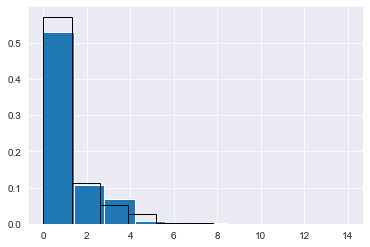

For alpha = 3 and beta = 0.5 p value of KS test is 0.8169954621664969 and of Anderson-Darling test 0.25


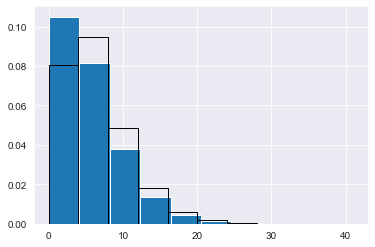

For alpha = 3 and beta = 1 p value of KS test is 0.9987875666204227 and of Anderson-Darling test 0.25


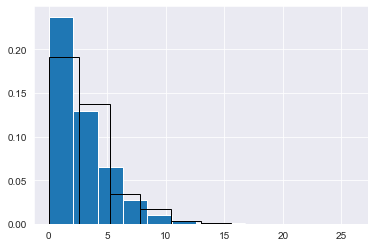

For alpha = 3 and beta = 2 p value of KS test is 0.9427850331225184 and of Anderson-Darling test 0.25


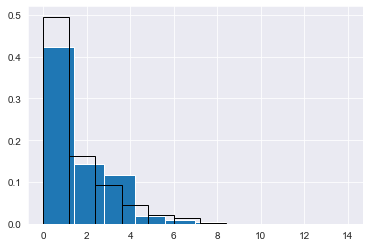

For alpha = 5 and beta = 0.5 p value of KS test is 0.4445009781931989 and of Anderson-Darling test 0.25


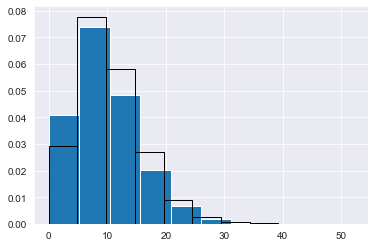

For alpha = 5 and beta = 1 p value of KS test is 0.3994316646755719 and of Anderson-Darling test 0.1166547967389638


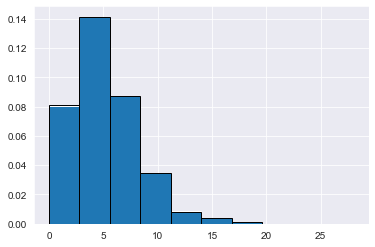

For alpha = 5 and beta = 2 p value of KS test is 0.9930714997071227 and of Anderson-Darling test 0.25


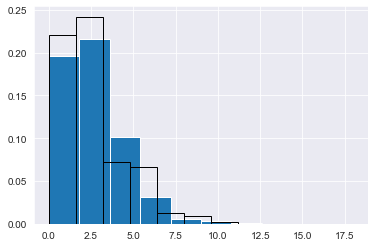

In [230]:
#ks test
ks_p_value_array = np.zeros((3,3))
for i in range(9):
    print(f'For alpha = {alpha_list[i//3]} and beta = {beta_list[i%3]} p value of KS test is {ss.kstest(mp_hist[i], nb_hist[i]).pvalue} and of Anderson-Darling test {ss.anderson_ksamp([mp_hist[i], nb_hist[i]]).significance_level}')
    ks_p_value_array[i//3, i%3] = ss.kstest(mp_hist[i], nb_hist[i]).pvalue
    plt.hist(mp_hist[i], density=True)
    plt.hist(nb_hist[i], edgecolor='black', facecolor='none', density=True)
    plt.show()

In [233]:
ks_p_value_array

array([[0.66138901, 0.18589067, 0.81366064],
       [0.81699546, 0.99878757, 0.94278503],
       [0.44450098, 0.39943166, 0.9930715 ]])

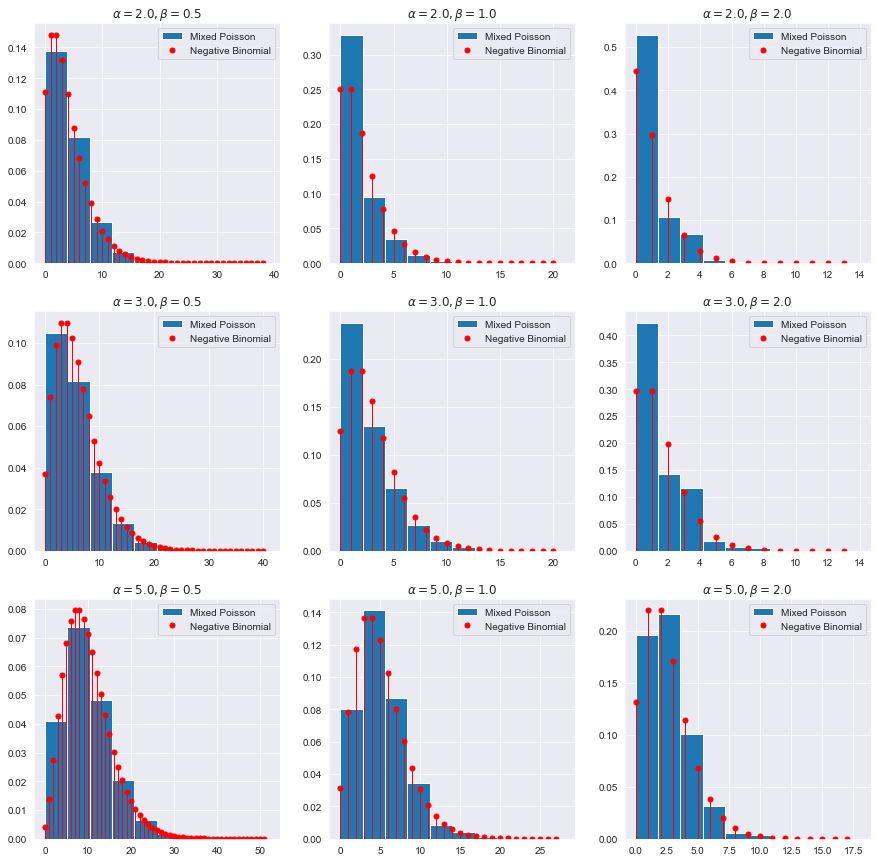

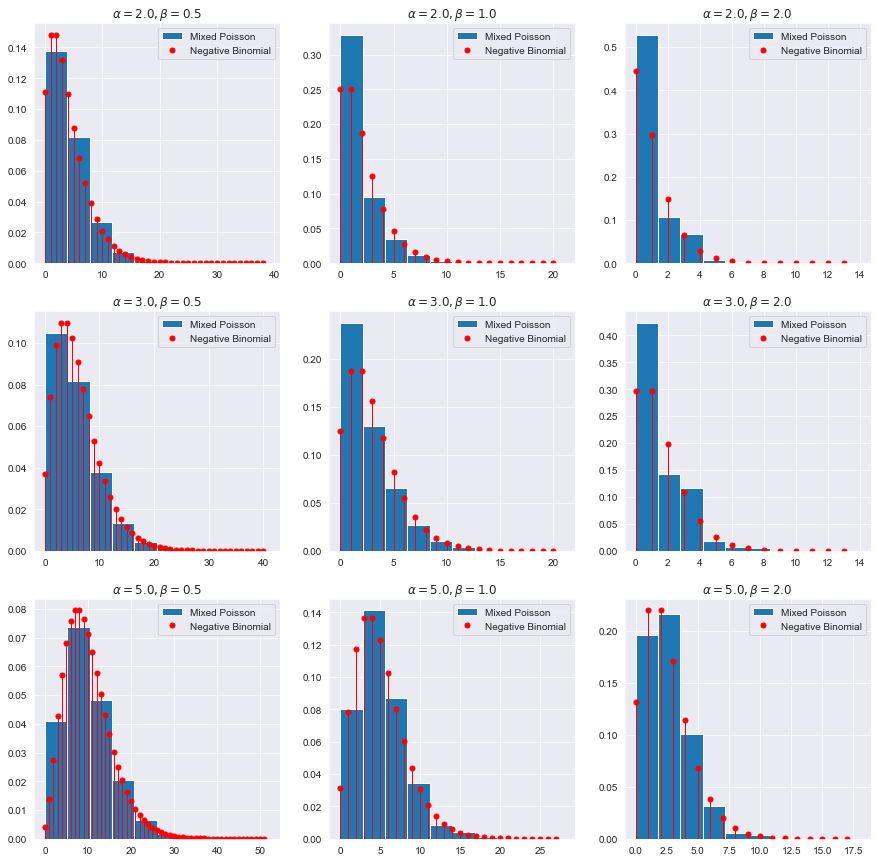

In [231]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

i = 0
for r in range(3):
    for c in range(3):
        ax[r,c].hist(mp_hist[i], density=True, label='Mixed Poisson')
        
        x = np.arange(0, int(np.max(mp_hist[i])))
        for j in range(len(nb_pmf[i])):
            ax[r,c].plot([x[j], x[j]], [0, nb_pmf[i][j]], color='red', linewidth=1)
            ax[r,c].plot(x[j], nb_pmf[i][j], 'o', color='red', markersize=5, label='Negative Binomial' if j == 0 else "")
            
        ax[r,c].legend()
        ax[r,c].set_title(r'$\alpha = ' + f'{alpha_list[r]:.1f}' + r', \beta = ' + f'{beta_list[c]:.1f}' + r'$')
        i += 1
        
fig

In [232]:
fig.savefig("Task3_distributions_comparison.svg")